In [1]:
from Search_based_Planning.Search_2D import Astar, Dijkstra, Bidirectional_a_star, ARAstar, RTAAStar, bfs, dfs, LRTAstar
from Sampling_based_Planning.rrt_2D import rrt, fast_marching_trees, rrt_connect, extended_rrt, plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

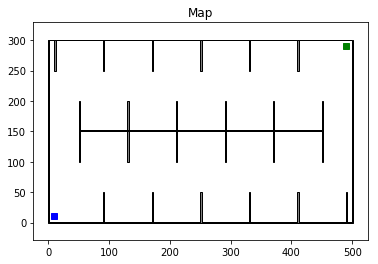

In [4]:
park = plotting.Plotting_my((10,10),(490,290))
park.plot_grid('Map')

A* 2.958639621734619 684.43354954613
Dijkstra 2.415621280670166 684.4335495461296
Bidirectional A* 3.8662939071655273 684.4335495461302
Anytime Repairing A* 1.1468403339385986 783.6021638285566
Real-time Adaptive A* 4.057949542999268 4165.712262545295
Breadth First 6.0189900398254395 684.4335495461299
RRT 1.847945213317871 739.1438414597433
RRT Connect 0.3029496669769287 729.7837972811936
Extended RRT 1.3490793704986572 846.7758643875612
RRT 1.6667680740356445 767.0895651228942
RRT Connect 0.3040351867675781 697.1289198164253
Extended RRT 0.3954601287841797 669.3828729075913
RRT 1.2225971221923828 786.1005898739594
RRT Connect 0.140000581741333 733.8048135128577
Extended RRT 1.276731252670288 858.7365792904397
RRT 2.5683653354644775 804.5120658851203
RRT Connect 0.16237854957580566 725.393717775628
Extended RRT 0.9286284446716309 838.8051546765852
RRT 0.6999900341033936 776.6370598754555
RRT Connect 0.2811117172241211 677.7994032598561
Extended RRT 0.9127700328826904 827.6452447589069


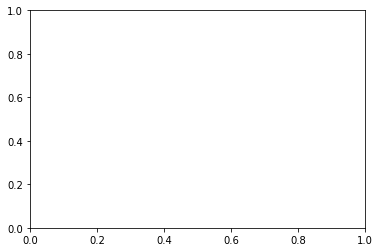

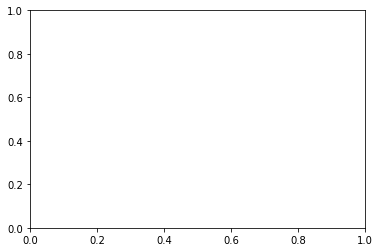

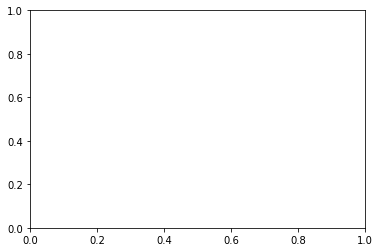

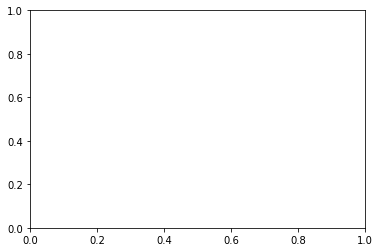

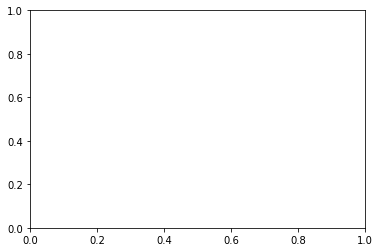

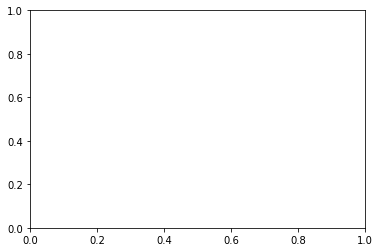

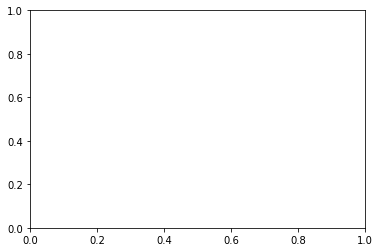

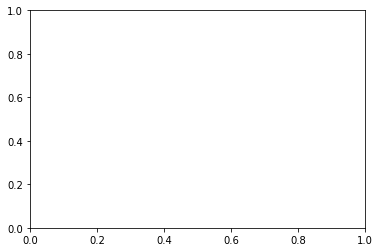

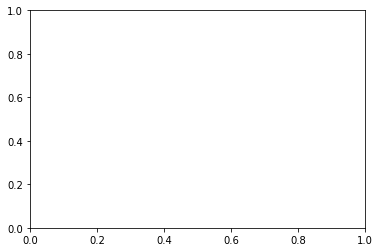

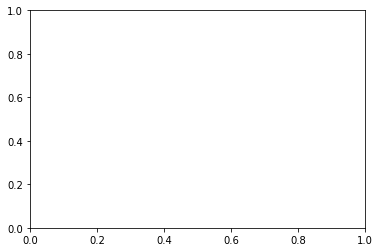

In [2]:
list_all = []
list_all.append(Astar.record_time())
list_all.append(Dijkstra.record_time())
list_all.append(Bidirectional_a_star.record_time())
list_all.append(ARAstar.record_time())
list_all.append(RTAAStar.record_time())
list_all.append(bfs.record_time())
# list_all.append(dfs.record_time())
# list_all.append(LRTAstar.record_time())
for i in range(10):
    list_all.append(rrt.record_time())
    # list_all.append(fast_marching_trees.record_time())
    list_all.append(rrt_connect.record_time())
    list_all.append(extended_rrt.record_time())


In [4]:
df = pd.DataFrame(list_all,columns=['Method Name','Time Used', 'Path Length'],dtype=float)

print(df)

              Method Name  Time Used  Path Length
0                      A*   2.958640   684.433550
1                Dijkstra   2.415621   684.433550
2        Bidirectional A*   3.866294   684.433550
3    Anytime Repairing A*   1.146840   783.602164
4   Real-time Adaptive A*   4.057950  4165.712263
5           Breadth First   6.018990   684.433550
6                     RRT   1.847945   739.143841
7             RRT Connect   0.302950   729.783797
8            Extended RRT   1.349079   846.775864
9                     RRT   1.666768   767.089565
10            RRT Connect   0.304035   697.128920
11           Extended RRT   0.395460   669.382873
12                    RRT   1.222597   786.100590
13            RRT Connect   0.140001   733.804814
14           Extended RRT   1.276731   858.736579
15                    RRT   2.568365   804.512066
16            RRT Connect   0.162379   725.393718
17           Extended RRT   0.928628   838.805155
18                    RRT   0.699990   776.637060


In [5]:
grouped = df.groupby('Method Name')
result = grouped.mean()
print(result)

                       Time Used  Path Length
Method Name                                  
A*                      2.958640   684.433550
Anytime Repairing A*    1.146840   783.602164
Bidirectional A*        3.866294   684.433550
Breadth First           6.018990   684.433550
Dijkstra                2.415621   684.433550
Extended RRT            0.762789   778.181338
RRT                     1.310083   782.407870
RRT Connect             0.226428   698.347597
Real-time Adaptive A*   4.057950  4165.712263


In [6]:
result_sorted = result.sort_values(by='Time Used', ascending=True)
result_sorted.to_csv('global_planning_time5.csv')
print(result_sorted)

                       Time Used  Path Length
Method Name                                  
RRT Connect             0.226428   698.347597
Extended RRT            0.762789   778.181338
Anytime Repairing A*    1.146840   783.602164
RRT                     1.310083   782.407870
Dijkstra                2.415621   684.433550
A*                      2.958640   684.433550
Bidirectional A*        3.866294   684.433550
Real-time Adaptive A*   4.057950  4165.712263
Breadth First           6.018990   684.433550


<Figure size 432x288 with 0 Axes>

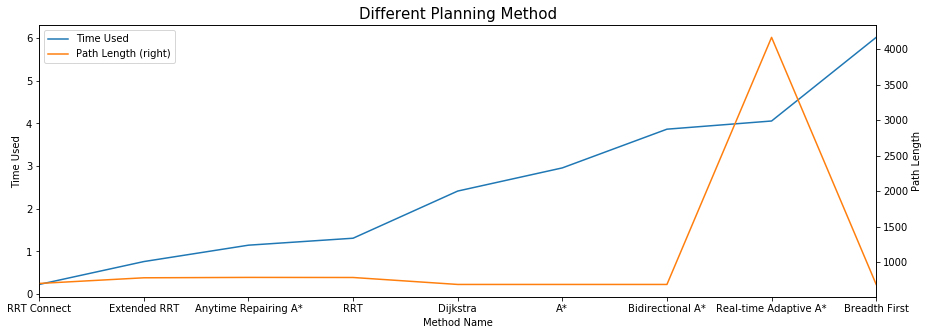

In [15]:
# result_sorted.plot();
plt.figure()

# ax = result_sorted.plot(y='Time Used', secondary_y=True, figsize=(15,5))
# set_ylabel设置标注，副坐标用right_ax.set_ylabel
ax = result_sorted.plot(secondary_y='Path Length',figsize=(15,5))
ax.set_ylabel('Time Used')
ax.right_ax.set_ylabel('Path Length')
ax.set_title('Different Planning Method', fontsize=15)
# result_sorted.plot(secondary_y='Path Length', figsize=(15,4))
# plt.grid(axis='both')
plt.show()
